In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# Load dataset
data = pd.read_csv('./dataset/FlierResponse.csv')
data.head()

,Age,Response
0,52,1
1,57,1
2,53,1
3,57,1
4,48,1


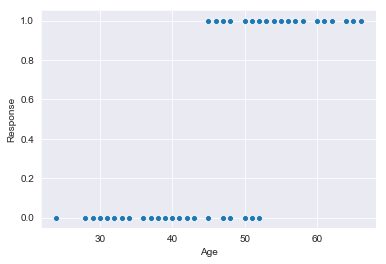

In [4]:
sns.scatterplot(x='Age',y='Response',data=data)
plt.show()

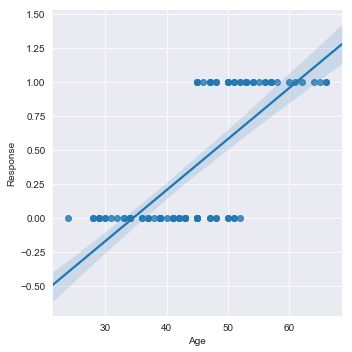

In [5]:
sns.lmplot(x='Age',y='Response',data=data)
plt.show()

In [6]:
import statsmodels.formula.api as smf

In [35]:
model = smf.glm(formula='Response~Age',data=data,family=sm.families.Binomial())
result = model.fit()

In [36]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                   92
Model:                            GLM   Df Residuals:                       90
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.968
Date:                Wed, 26 Dec 2018   Deviance:                       49.937
Time:                        01:00:35   Pearson chi2:                     46.3
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4078      4.523     -4.512      0.000     -29.273     -11.542
Age            0.4259      0.095      4.492      0.0

In [37]:
result.null_deviance

123.15634524584677

In [26]:
import statsmodels.api as sm

In [28]:
data.keys()

Index(['Age', 'Response'], dtype='object')

In [30]:
mod = sm.genmod.GLM(data['Response'],data['Age'])
ress = mod.fit()

In [32]:
print(ress.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                   92
Model:                            GLM   Df Residuals:                       91
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                         0.18411
Method:                          IRLS   Log-Likelihood:                -52.198
Date:                Wed, 26 Dec 2018   Deviance:                       16.754
Time:                        00:55:48   Pearson chi2:                     16.8
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0100      0.001     10.224      0.000       0.008       0.012


In [9]:
model1 = smf.logit(formula='Response~Age',data=data)
result1 = model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.271395
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                   92
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Dec 2018   Pseudo R-squ.:                  0.5945
Time:                        00:16:51   Log-Likelihood:                -24.968
converged:                       True   LL-Null:                       -61.578
                                        LLR p-value:                 1.160e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.4078      4.523     -4.512      0.000     -29.273     -11.542
Age            0.4259      0.

In [12]:
result1.params

Intercept   -20.407817
Age           0.425916
dtype: float64

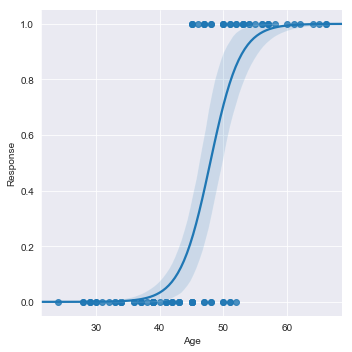

In [11]:
sns.lmplot(x='Age',y='Response',data=data,logistic=True)
plt.show()

In [16]:
result1.predict(pd.DataFrame({'Age':[50]}))

0    0.708471
dtype: float64

In [19]:
np.log(0.708/(1-0.708))

0.8856902914254378

In [24]:
result1.resid_dev.var()

0.5481717535469721

In [25]:
result1.llnull

-61.57817262741726

In [20]:
np.exp(result1.params)

Intercept    1.370874e-09
Age          1.530992e+00
dtype: float64